In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils import pie_plot
import numpy as np
# diff balance in origin and dest 

## Balances in origin

In [3]:
data = pd.read_csv('../../data/processed/fraud_viz_df.csv') 


In [4]:
subset_orig = data[[ 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'isFraud']].copy()
subset_orig['diffBalanceOrig'] = (subset_orig['oldbalanceOrig'] - subset_orig['newbalanceOrig']).round(2)


In [5]:
fraud_subset_orig = subset_orig.query('isFraud == 1').copy().reset_index(drop = True)
corr_fraud_subset_orig = fraud_subset_orig.drop(columns = 'isFraud').corr()
corr_fraud_subset_orig

,amount,oldbalanceOrig,newbalanceOrig,diffBalanceOrig
amount,1.000000,0.858859,0.338561,0.993904
oldbalanceOrig,0.858859,1.000000,0.767811,0.850741
newbalanceOrig,0.338561,0.767811,1.000000,0.316478
diffBalanceOrig,0.993904,0.850741,0.316478,1.000000


In [6]:
non_fraud_subset_orig = subset_orig.query('isFraud == 0').copy().reset_index(drop = True)
corr_non_fraud_subset_orig = non_fraud_subset_orig.drop(columns = 'isFraud').corr()
corr_non_fraud_subset_orig

,amount,oldbalanceOrig,newbalanceOrig,diffBalanceOrig
amount,1.000000,-0.009092,-0.008521,-0.012479
oldbalanceOrig,-0.009092,1.000000,0.999417,-0.340197
newbalanceOrig,-0.008521,0.999417,1.000000,-0.372112
diffBalanceOrig,-0.012479,-0.340197,-0.372112,1.000000


Observations: 

fraud_subset_orig shows high correlation between amount and oldbalanceOrig with diffBalanceOrig. Fraudsters try to extract the whole amount of money that users have inside the account. That could be a nice flag. 

non_fraud_subset_orig confirms that this behaviour doesn't appear on legitimate transactions. The NaN values of isFlaggedFraud just show that there is no variability in the results so the previous model works very well not giving False Positives

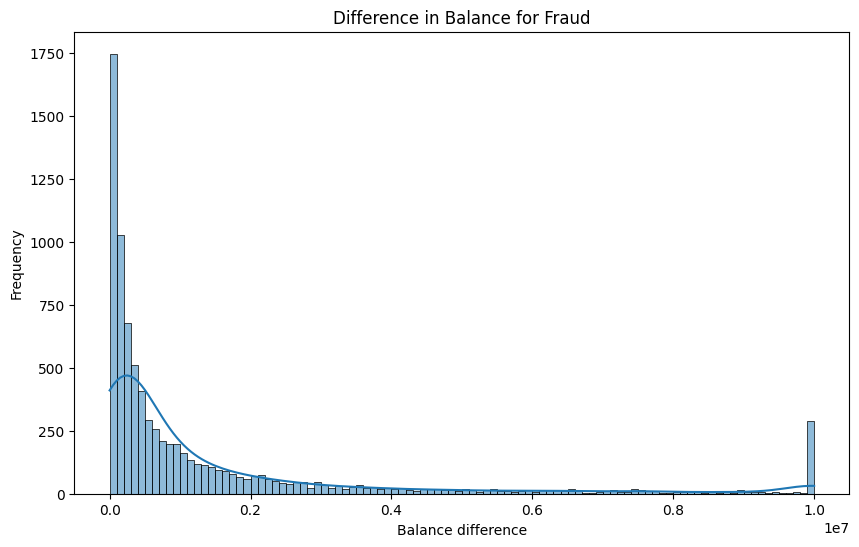

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(fraud_subset_orig['diffBalanceOrig'], bins=100, kde=True)
plt.title('Difference in Balance for Fraud')
plt.xlabel('Balance difference')
plt.ylabel('Frequency')
plt.show()

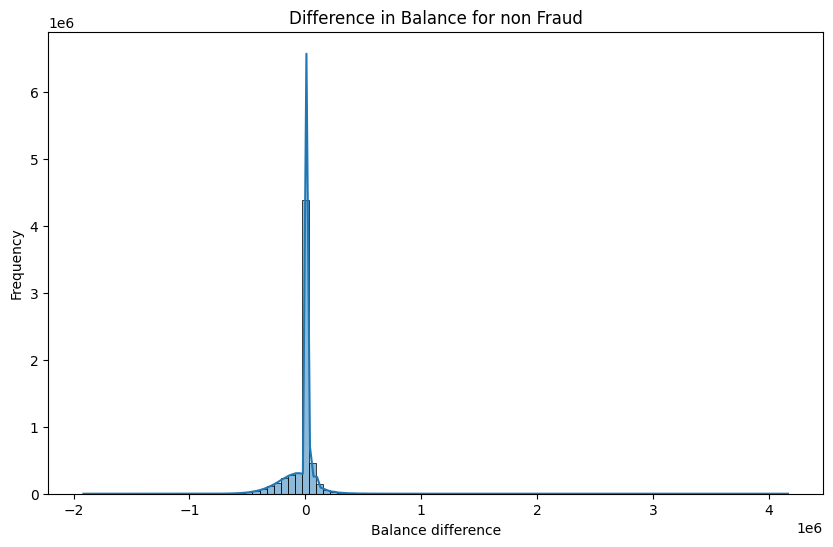

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(non_fraud_subset_orig['diffBalanceOrig'], bins=100, kde=True)
plt.title('Difference in Balance for non Fraud')
plt.xlabel('Balance difference')
plt.ylabel('Frequency')
plt.show()

### Balances in destination

In [9]:
subset_dest = data[[ 'amount', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].copy()
subset_dest['diffBalanceDest'] = (subset_dest['newbalanceDest'] - subset_dest['oldbalanceDest']).round(2)


In [10]:
fraud_subset_dest = subset_dest.query('isFraud == 1').copy().reset_index(drop = True)
corr_fraud_subset_dest = fraud_subset_dest.drop(columns = 'isFraud').corr()
corr_fraud_subset_dest

,amount,oldbalanceDest,newbalanceDest,diffBalanceDest
amount,1.000000,-0.007037,0.299403,0.642864
oldbalanceDest,-0.007037,1.000000,0.880353,0.056390
newbalanceDest,0.299403,0.880353,1.000000,0.523208
diffBalanceDest,0.642864,0.056390,0.523208,1.000000


In [11]:
non_fraud_subset_dest = subset_dest.query('isFraud == 0').copy().reset_index(drop = True)
corr_non_fraud_subset_dest = non_fraud_subset_dest.drop(columns = 'isFraud').corr()
corr_non_fraud_subset_dest

,amount,oldbalanceDest,newbalanceDest,diffBalanceDest
amount,1.000000,0.298774,0.464114,0.850764
oldbalanceDest,0.298774,1.000000,0.976723,0.233333
newbalanceDest,0.464114,0.976723,1.000000,0.436486
diffBalanceDest,0.850764,0.233333,0.436486,1.000000


Observations:

In this case the variable amount is the most correlated to the difference in balances. More research could be done here since there must be some missing data because balances in the origin and the destination don't match so that would mean there is some sort of by-pass that sends the money somewhere else? 

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(fraud_subset_dest['diffBalanceDest'], bins=100, kde=True)
plt.title('Difference in Balance for Fraud')
plt.xlabel('Balance difference')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(non_fraud_subset_dest['diffBalanceDest'], bins=100, kde=True)
plt.title('Difference in Balance for non Fraud')
plt.xlabel('Balance difference')
plt.ylabel('Frequency')
plt.show()